<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(0_4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.4_n250.csv',
 'data_multi_delta_0.4_n120.csv',
 'data_multi_delta_0.4_n60.csv',
 'data_multi_delta_0.4_n30.csv',
 'data_multi_delta_0.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,22.232430,-0.222184,32.010247,32.049917,-0.039671
1,0.0,1.0,54.581441,0.234165,64.815606,64.843068,-0.027461
2,0.0,2.0,27.544001,0.200466,37.744467,37.434414,0.310054
3,0.0,3.0,86.713345,-1.046175,95.667170,97.416131,-1.748961
4,0.0,4.0,46.647082,-3.317122,53.329960,56.799773,-3.469813
...,...,...,...,...,...,...,...
29995,999.0,25.0,67.673579,1.893903,79.567483,77.979432,1.588051
29996,999.0,26.0,70.259997,0.071358,80.331355,80.509480,-0.178126
29997,999.0,27.0,26.206000,1.349939,37.555939,37.415606,0.140333
29998,999.0,28.0,74.898889,1.086236,85.985125,85.047271,0.937854


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,22.232430,-0.222184,32.010247,32.049917,-0.039671
1,0.0,1.0,54.581441,0.234165,64.815606,64.843068,-0.027461
2,0.0,2.0,27.544001,0.200466,37.744467,37.434414,0.310054
3,0.0,3.0,86.713345,-1.046175,95.667170,97.416131,-1.748961
4,0.0,4.0,46.647082,-3.317122,53.329960,56.799773,-3.469813
...,...,...,...,...,...,...,...
29995,999.0,25.0,67.673579,1.893903,79.567483,77.979432,1.588051
29996,999.0,26.0,70.259997,0.071358,80.331355,80.509480,-0.178126
29997,999.0,27.0,26.206000,1.349939,37.555939,37.415606,0.140333
29998,999.0,28.0,74.898889,1.086236,85.985125,85.047271,0.937854


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    22.232430 -0.222184  32.010247  32.049917 -0.039671
      1.0    54.581441  0.234165  64.815606  64.843068 -0.027461
      2.0    27.544001  0.200466  37.744467  37.434414  0.310054
      3.0    86.713345 -1.046175  95.667170  97.416131 -1.748961
      4.0    46.647082 -3.317122  53.329960  56.799773 -3.469813
...                ...       ...        ...        ...       ...
999.0 25.0   67.673579  1.893903  79.567483  77.979432  1.588051
      26.0   70.259997  0.071358  80.331355  80.509480 -0.178126
      27.0   26.206000  1.349939  37.555939  37.415606  0.140333
      28.0   74.898889  1.086236  85.985125  85.047271  0.937854
      29.0   87.169268 -4.398435  92.770833  97.050227 -4.279394

[30000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    22.232430 -0.222184  32.010247  32.049917 -0.039671
      1.0    54.581441  0.234165  64.815606  64.843068 -0.027461
      2.0    27.544001  0.200466  37.744467  37.434414  0.310054
      3.0    86.713345 -1.046175  95.667170  97.416131 -1.748961
      4.0    46.647082 -3.317122  53.329960  56.799773 -3.469813
...                ...       ...        ...        ...       ...
999.0 25.0   67.673579  1.893903  79.567483  77.979432  1.588051
      26.0   70.259997  0.071358  80.331355  80.509480 -0.178126
      27.0   26.206000  1.349939  37.555939  37.415606  0.140333
      28.0   74.898889  1.086236  85.985125  85.047271  0.937854
      29.0   87.169268 -4.398435  92.770833  97.050227 -4.279394

[30000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,22.232430,-0.222184,32.010247,32.049917,-0.039671
1,0.0,1.0,54.581441,0.234165,64.815606,64.843068,-0.027461
2,0.0,2.0,27.544001,0.200466,37.744467,37.434414,0.310054
3,0.0,3.0,86.713345,-1.046175,95.667170,97.416131,-1.748961
4,0.0,4.0,46.647082,-3.317122,53.329960,56.799773,-3.469813
...,...,...,...,...,...,...,...
29995,999.0,25.0,67.673579,1.893903,79.567483,77.979432,1.588051
29996,999.0,26.0,70.259997,0.071358,80.331355,80.509480,-0.178126
29997,999.0,27.0,26.206000,1.349939,37.555939,37.415606,0.140333
29998,999.0,28.0,74.898889,1.086236,85.985125,85.047271,0.937854


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    22.232430 -0.222184  32.010247  32.049917 -0.039671
      1.0    54.581441  0.234165  64.815606  64.843068 -0.027461
      2.0    27.544001  0.200466  37.744467  37.434414  0.310054
      3.0    86.713345 -1.046175  95.667170  97.416131 -1.748961
      4.0    46.647082 -3.317122  53.329960  56.799773 -3.469813
...                ...       ...        ...        ...       ...
999.0 25.0   67.673579  1.893903  79.567483  77.979432  1.588051
      26.0   70.259997  0.071358  80.331355  80.509480 -0.178126
      27.0   26.206000  1.349939  37.555939  37.415606  0.140333
      28.0   74.898889  1.086236  85.985125  85.047271  0.937854
      29.0   87.169268 -4.398435  92.770833  97.050227 -4.279394

[30000 rows x 5 columns]

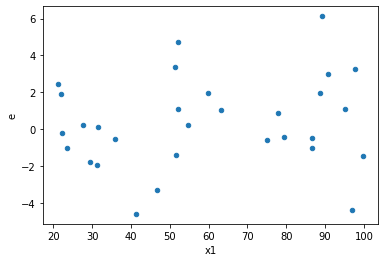

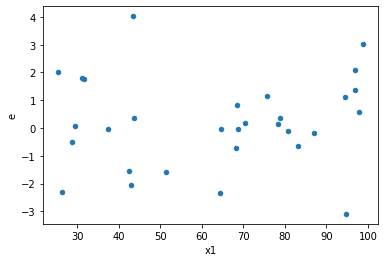

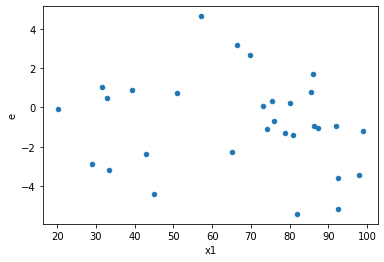

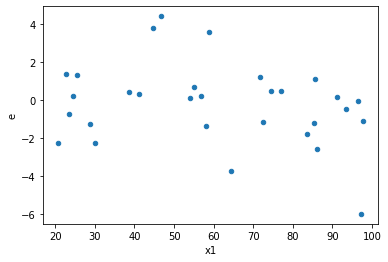

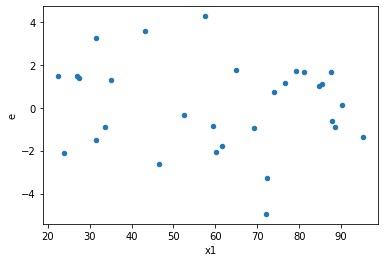

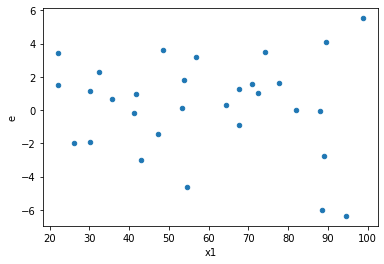

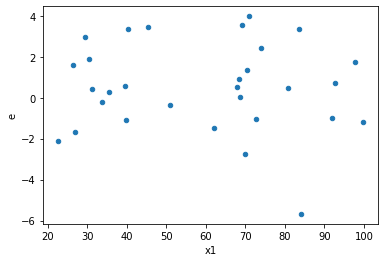

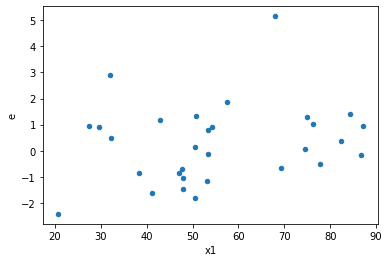

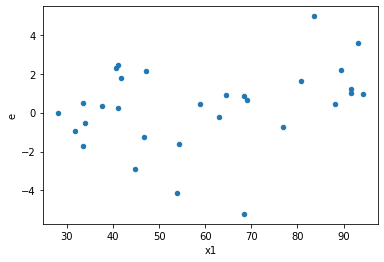

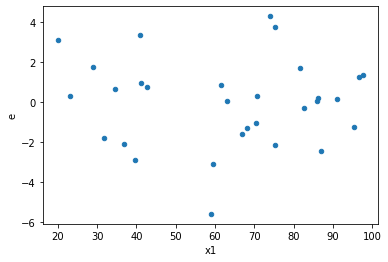

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,11.0,11.0,56.10525167730424,81.10098120895955,5.100477425209476,7.372816473541778,1.4455149702459424,0.5513875784076419,0.7243062107961791,0.2756937892038209,Reject001=1 : Homoscedasticity
5.0,11.0,11.0,50.43902571954973,142.15480710091947,4.585365974504521,12.92316428190177,2.818349582946474,0.09995324028929331,0.9500233798553533,0.049976620144646655,Reject001=1 : Homoscedasticity
6.0,11.0,11.0,31.38939678930707,79.70580708893226,2.8535815263006428,7.245982462630206,2.5392589613599834,0.13749073377893573,0.9312546331105321,0.06874536688946786,Reject001=1 : Homoscedasticity
7.0,11.0,11.0,23.71072191459077,23.79361585142035,2.155520174053706,2.163055986492759,1.003496052845973,0.9954859428531388,0.5022570285734306,0.4977429714265694,Reject001=1 : Homoscedasticity
8.0,11.0,11.0,29.218648921956728,47.883455408063206,2.6562408110869753,4.3530414007330185,1.6387977259304611,0.4255428076414993,0.7872285961792503,0.21277140382074966,Reject001=1 : Homoscedasticity
10.0,11.0,11.0,26.22488688274337,68.23428284399508,2.384080625703943,6.20311662218137,2.601890454249964,0.12782961505685697,0.9360851924715715,0.06391480752842849,Reject001=1 : Homoscedasticity
11.0,11.0,11.0,33.75463352894256,65.30875433338342,3.0686030480856874,5.937159484853038,1.934808573092198,0.288833691467004,0.855583154266498,0.144416845733502,Reject001=1 : Homoscedasticity
12.0,11.0,11.0,29.71768424811703,102.93774129600772,2.70160765891973,9.357976481455246,3.4638547349977324,0.050495434203917666,0.9747522828980412,0.025247717101958833,Reject001=1 : Homoscedasticity
13.0,11.0,11.0,37.43125047705562,113.04123399389461,3.4028409524596017,10.276475817626782,3.019969478796492,0.08011668675015748,0.9599416566249213,0.04005834337507874,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,11.0,56.10525167730424,81.10098120895955,5.100477425209476,7.372816473541778,1.4455149702459424,0.5513875784076419,Reject001=1 : Homoscedasticity
1.0,11.0,11.0,40.10162317609419,24.185720576283906,3.645602106917654,2.198701870571264,0.6031107636236968,0.4147788513414848,Reject001=1 : Homoscedasticity
2.0,11.0,11.0,72.88578067735594,51.41092680878265,6.625980061577812,4.673720618980241,0.7053629162094566,0.5724545391957633,Reject001=1 : Homoscedasticity
3.0,11.0,11.0,34.92065141580063,34.80662606862074,3.1746046741636933,3.164238733510976,0.996734730236782,0.9957696481382798,Reject001=1 : Homoscedasticity
4.0,11.0,11.0,54.27420767732404,25.461682934051762,4.9340188797567315,2.31469844855016,0.4691304401057105,0.22508643074075335,Reject001=1 : Homoscedasticity
5.0,11.0,11.0,50.43902571954973,142.15480710091947,4.585365974504521,12.92316428190177,2.818349582946474,0.09995324028929331,Reject001=1 : Homoscedasticity
6.0,11.0,11.0,31.38939678930707,79.70580708893226,2.8535815263006428,7.245982462630206,2.5392589613599834,0.13749073377893573,Reject001=1 : Homoscedasticity
7.0,11.0,11.0,23.71072191459077,23.79361585142035,2.155520174053706,2.163055986492759,1.003496052845973,0.9954859428531388,Reject001=1 : Homoscedasticity
8.0,11.0,11.0,29.218648921956728,47.883455408063206,2.6562408110869753,4.3530414007330185,1.6387977259304611,0.4255428076414993,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      972
Reject001=0 : Heteroscedasticity     28
Name: Result_test, dtype: int64